#  Market Basket Analysis

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Installing the apyori to perform the Apriori algorithm

In [2]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=48015eb3940ad147ce121dc022745f2cf5463984be2596e05d8cdca82c02c6f1
  Stored in directory: c:\users\dharini\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from apyori import apriori

# Importing the dataset


In [4]:
df = pd.read_csv("C:/Users/Dharini/Downloads/Groceries_dataset.csv/Groceries_dataset.csv")

# Data Analysis

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.shape

(38765, 3)

In [8]:
df.size

116295

In [9]:
df.ndim

2

In [10]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
# Q1. Which of the items are the top 10 selling item?
df.itemDescription.value_counts().head(10)

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 selling items')

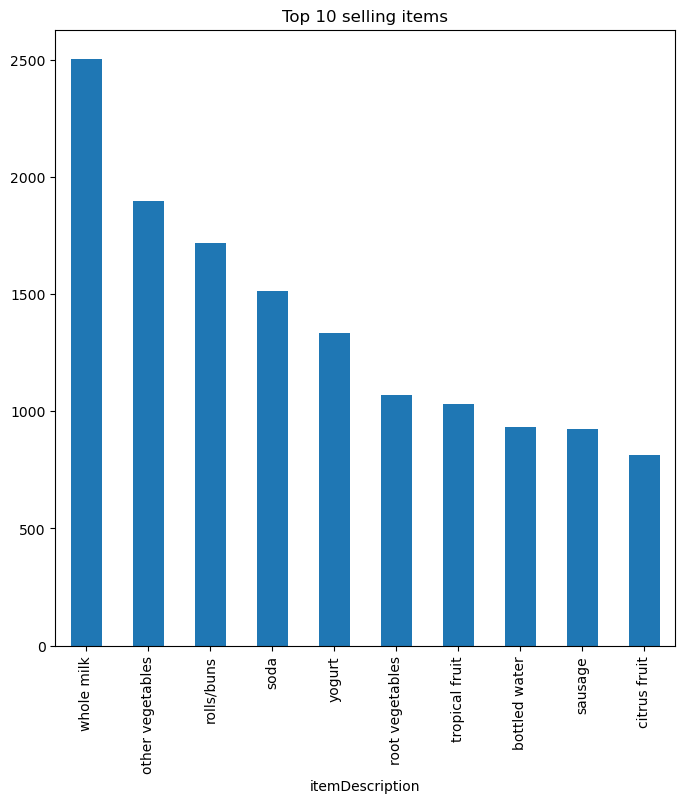

In [13]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')

In [14]:
# Q2. Which of the item is the least 10 selling item?
df.itemDescription.value_counts().tail(10).sort_values()

itemDescription
kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: count, dtype: int64

<AxesSubplot: xlabel='itemDescription'>

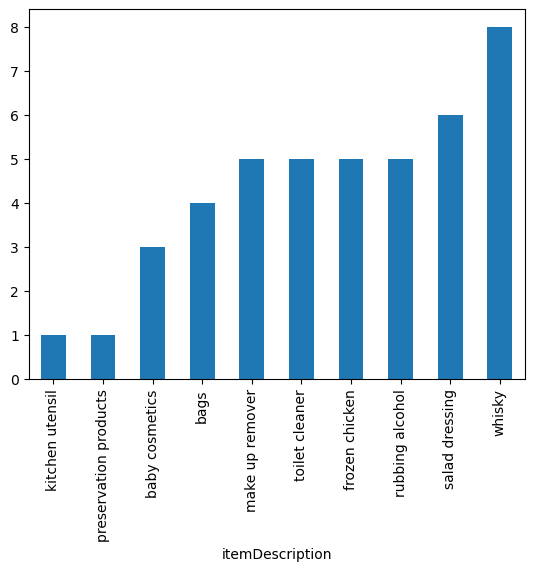

In [15]:
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()

In [16]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [17]:
# Q3. Top 10 customers
df.Member_number.value_counts().head(10)

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: count, dtype: int64

<AxesSubplot: xlabel='Member_number'>

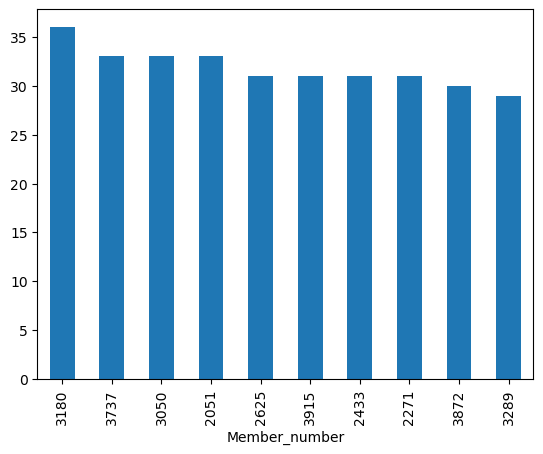

In [18]:
df.Member_number.value_counts().head(10).plot.bar()

In [19]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [20]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [21]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [22]:
# Q4. In which year, the majority of the transactions has happened?
df.Year.value_counts()

Year
2015    20488
2014    18277
Name: count, dtype: int64

In [23]:
df.Month.value_counts()

Month
8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: count, dtype: int64

In [24]:
df.Day.value_counts()

Day
28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: count, dtype: int64

In [25]:
df[df['Year']==2015]['Month'].value_counts()

Month
8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: count, dtype: int64

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
transaction_counts = df['Year'].value_counts()
most_transactions_year = transaction_counts.idxmax()
print("The majority of transactions occurred in the year:", most_transactions_year)


The majority of transactions occurred in the year: 2015


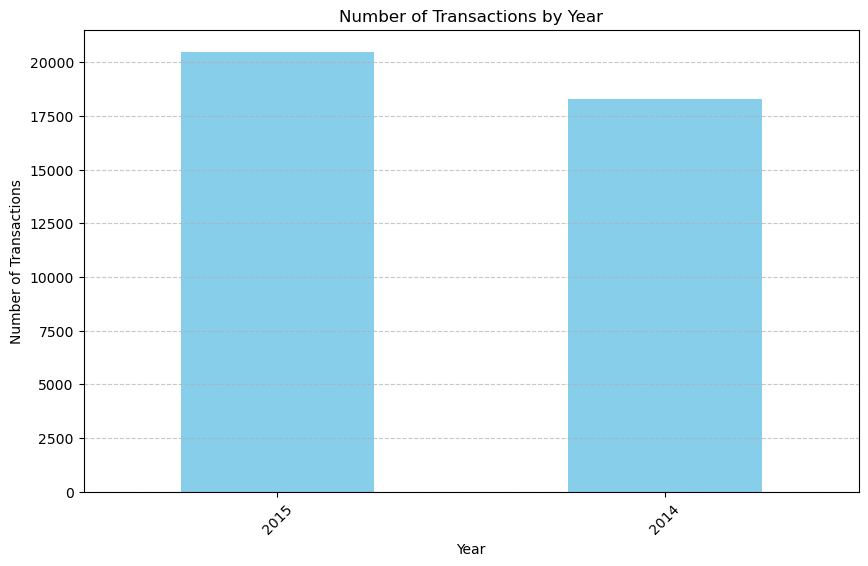

In [57]:
# Plotting
plt.figure(figsize=(10, 6))
transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Aprori Implementation

In [27]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [28]:
data = df.copy()
data1 = data.copy()

In [29]:
data = pd.get_dummies(data['itemDescription'])


In [30]:
data.head(2)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
data1.drop(['itemDescription'], axis=1, inplace=True)

In [32]:
data1 = data1.join(data)

In [33]:
data1.head()

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,2015,5,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,2015,9,19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,2015,12,12,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,2015,1,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [34]:
products = df['itemDescription'].unique()

In [35]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [36]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [37]:
data1.groupby(['Member_number', 'Date'])[products[:]].sum()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [38]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [39]:
data2 = data2.reset_index()[products]

In [40]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
data2['tropical fruit']

0        0
1        0
2        0
3        0
4        0
        ..
14958    1
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: int64

In [43]:
def func(data):
  for i in products:
    if data[i] > 0:
      data[i] = i
  return data

In [44]:
data2 = data2.apply(func,axis=1)

In [45]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
newdata = data2.values

In [47]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [48]:
newdata.ndim

2

In [49]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [50]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [58]:
newdata

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

# Aproiori Implementation

In [51]:
association = apriori(newdata, 
                      min_support=0.0003,
                      min_confidence=0.05,
                      min_lift=3,
                      max_length=2)

result = list(association)

In [52]:
result[5]

RelationRecord(items=frozenset({'seasonal products', 'soups'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)])

In [53]:
for i in result[5]:
  print(i)

frozenset({'seasonal products', 'soups'})
0.0003341575887188398
[OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'seasonal products'}), confidence=0.10416666666666667, lift=14.704205974842768)]


- Items: soups -> seasonal products
- Support: 0.0003341575887188398 (indicating the proportion of transactions that contain both soups and seasonal products)
- Confidence: 0.10416666666666667 (indicating the probability of purchasing seasonal products given that soups are purchased)
- Lift: 14.704205974842768 (indicating how much more likely seasonal products are purchased when soups are purchased, compared to when they are purchased independently)

In [54]:
type(result[5])

apyori.RelationRecord

[('soups', 'seasonal products')]
[0.10416666666666667]
[14.704205974842768]


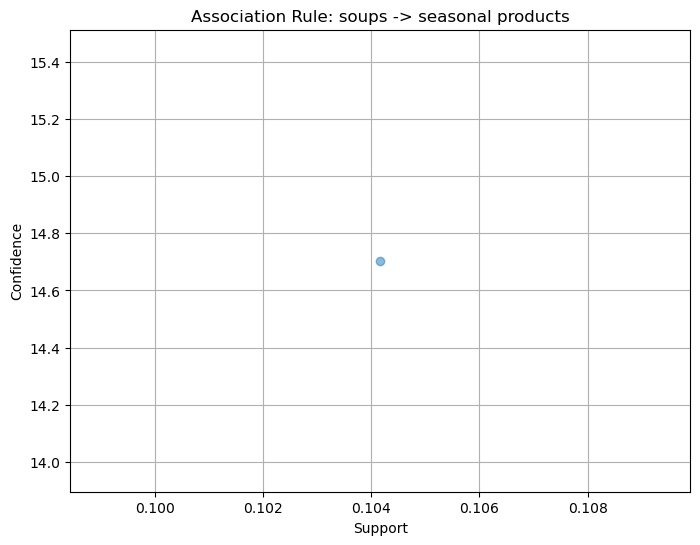

In [61]:
import matplotlib.pyplot as plt

# Sample association rule
association_rule = [('soups', 'seasonal products', 0.10416666666666667, 14.704205974842768)]

# Extracting support and confidence values
items = [(rule[0], rule[1]) for rule in association_rule]
support = [rule[2] for rule in association_rule]
confidence = [rule[3] for rule in association_rule]

print(items)
print(support)
print(confidence)
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(support, confidence, alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rule: soups -> seasonal products')
plt.grid(True)
plt.show()


* The conclusion from this association rule is that there is a strong positive association between purchasing soups and purchasing seasonal products. 

* Specifically, when customers buy soups, they are 10.42% likely to also purchase seasonal products, and this likelihood is 14.70 times higher than what would be expected if the purchase of soups and seasonal products were independent of each other.

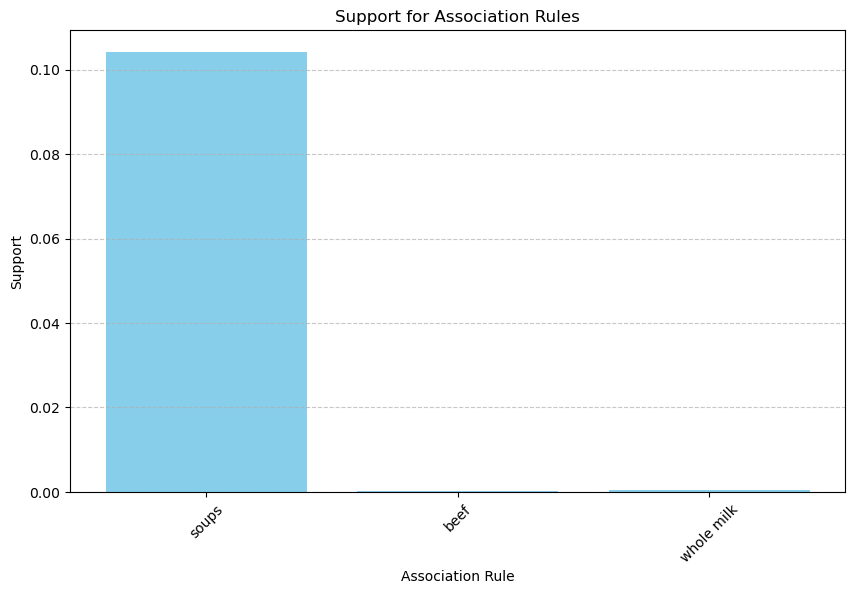

In [63]:
import matplotlib.pyplot as plt

# Sample association rules
association_rules = [
    ('soups -> seasonal products', 0.10416666666666667),
    ('beef -> napkins', 0.00027392739273927394),
    ('whole milk -> yogurt', 0.00041967871485943775)
]

# Extracting items and support values
items = [rule.split(' -> ')[0] for rule, _ in association_rules]
support = [support for _, support in association_rules]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(items, support, color='skyblue')
plt.xlabel('Association Rule')
plt.ylabel('Support')
plt.title('Support for Association Rules')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [64]:
association_rules = [
    ('whole milk -> yogurt', 0.00041967871485943775, 0.10416666666666667, 3.12741967871486),
    ('beef -> napkins', 0.00027392739273927394, 0.08333333333333333, 3.255767443611353),
    ('pip fruit -> rolls/buns', 0.00017523407028288558, 0.1388888888888889, 4.177667079906591)
]

for rule in association_rules:
    items, support, confidence, lift = rule
    print(f"Association Rule: {items}")
    print(f"Support: {support}")
    print(f"Confidence: {confidence}")
    print(f"Lift: {lift}")
    print("\n")


Association Rule: whole milk -> yogurt
Support: 0.00041967871485943775
Confidence: 0.10416666666666667
Lift: 3.12741967871486


Association Rule: beef -> napkins
Support: 0.0002739273927392739
Confidence: 0.08333333333333333
Lift: 3.255767443611353


Association Rule: pip fruit -> rolls/buns
Support: 0.00017523407028288557
Confidence: 0.1388888888888889
Lift: 4.177667079906591




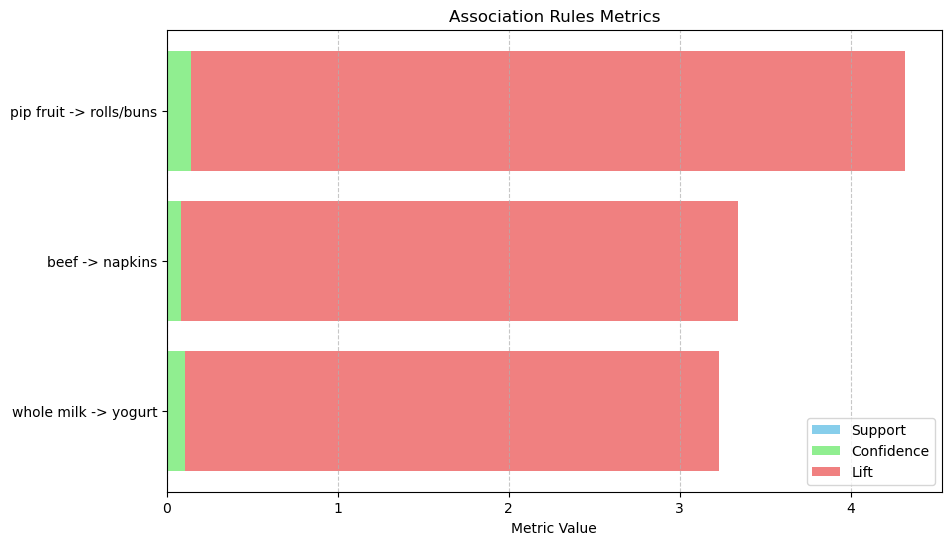

In [65]:
# Association rules
rules = ['whole milk -> yogurt', 'beef -> napkins', 'pip fruit -> rolls/buns']
support = [0.00041967871485943775, 0.0002739273927392739, 0.00017523407028288557]
confidence = [0.10416666666666667, 0.08333333333333333, 0.1388888888888889]
lift = [3.12741967871486, 3.255767443611353, 4.177667079906591]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(rules, support, color='skyblue', label='Support')
plt.barh(rules, confidence, color='lightgreen', left=support, label='Confidence')
plt.barh(rules, lift, color='lightcoral', left=[sup + conf for sup, conf in zip(support, confidence)], label='Lift')
plt.xlabel('Metric Value')
plt.title('Association Rules Metrics')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

 *  Customers who purchase whole milk are 10.42% likely to also purchase yogurt, with a lift of 3.13. This indicates a moderate positive association between whole milk and yogurt purchases.

 * Customers who purchase beef are 8.33% likely to also purchase napkins, with a lift of 3.26. This suggests a moderate positive association between beef and napkins purchases.

* Customers who purchase pip fruit are 13.89% likely to also purchase rolls/buns, with a lift of 4.18. This indicates a strong positive association between pip fruit and rolls/buns purchases.